**Data Set Information:**

This is a large dataset of news items and their respective social feedback on multiple platforms: Facebook, Google+ and LinkedIn.
The collected data relates to a period of 8 months, between November 2015 and July 2016, accounting for about 100,000 news items on four different topics: economy, microsoft, obama and palestine.
This data set is tailored for evaluative comparisons in predictive analytics tasks, although allowing for tasks in other research areas such as topic detection and tracking, sentiment analysis in short text, first story detection or news recommendation.

The features of each instance and their definition are as follows:

* IDLink (numeric): Unique identifier of news items.
* Title (string): Title of the news item according to the official media sources.
* Headline (string): Headline of the news item according to the official media sources.
* Source (string): Original news outlet that published the news item.
* Topic (string): Query topic used to obtain the items in the official media sources.
* PublishDate (timestamp): Date and time of the news items' publication.
* SentimentTitle (numeric): Sentiment score of the text in the news items' title.
* SentimentHeadline (numeric): Sentiment score of the text in the news items' headline.
* Facebook (numeric): Final value of the news items' popularity according to the social media source Facebook.
* GooglePlus (numeric): Final value of the news items' popularity according to the social media source Google+.
* LinkedIn (numeric): Final value of the news items' popularity according to the social media source LinkedIn .

Some of the required libraries..

In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install pandas_profiling
# !pip install colorama
# !pip install plotly
# !pip install seaborn
# !pip install scipy
# !pip install scikit-learn
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set(style='whitegrid')
!pip install wordcloud
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
!pip install gensim
import re
import gensim
import string

!pip install keras
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant


!pip install tensorflow
import warnings
warnings.simplefilter('ignore')
import tensorflow as tf
!pip install nltk
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
!pip install pandas_profiling
from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats
!pip install colorama
from colorama import Fore, Back, Style
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
!pip install catboost
from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 86.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3828505ddf804092a9e060091ffd5bb108d5438605928672f13d91c331e149c4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00


Data & Exploratory Data Analysis

In [3]:
# import pandas as pd

# # Load the CSV data
# hits_data = pd.read_csv("/home/mr-cern/Desktop/Python/News_Final.csv")

# # Sample a fraction of the data (e.g., 30%)
# sampled_data = hits_data.sample(frac=0.05, random_state=42)  # Adjust the fraction as needed

# # Save the sampled data to a new CSV file
# hits_data=sampled_data.to_csv("/home/mr-cern/Desktop/Python/Sampled_News_Final.csv", index=False)


sampled_data = pd.read_csv("/content/Sampled_News_Final.csv")
sampled_data.head()

IDLink                                              Title  \
0  68153.0  Obama, Nerd President, Needs to Get Right With...   
1  47207.0  Johannesburg committed to developing job inten...   
2  71039.0                            Whose President Was He?   
3  44514.0  Argentina pays off 'holdout' bondholders, elev...   
4  98795.0  Obama: Trump displays ignorance, seeks tweets ...   

                                            Headline  \
0  President Barack Obama knocked off work on Fri...   
1  THE City of Johannesburg has committed itself ...   
2  """If I spent all my time thinking about it, I...   
3  In recent years, soybean farmer Mario Caceres ...   
4  U.S. President Barack Obama disparaged U.S. Re...   

                       Source    Topic          PublishDate  SentimentTitle  \
0  Wall Street Journal (blog)    obama  2015-12-21 16:46:40        0.067168   
1                      BDlive  economy  2016-05-04 12:41:17       -0.039591   
2           POLITICO Magazine    obama  2016-01-07 00:00:00        0.000000   
3           Los Angeles Times  economy  2016-04-23 11:01:15       -0.101852   
4                PoliticusUSA    obama  2016-05-28 13:35:28        0.000000   

   SentimentHeadline  Facebook  GooglePlus  LinkedIn  
0          -0.062808       100           1         0  
1          -0.024436         4           1         2  
2           0.408575        87           1         1  
3           0.437500        -1           0         3  
4           0.000000       181          16         1

In [4]:
print(sampled_data.isnull().sum()) ## Checking null values in data and filling those values
sampled_data.fillna(0)

IDLink                0
Title                 0
Headline              2
Source               18
Topic                 0
PublishDate           0
SentimentTitle        0
SentimentHeadline     0
Facebook              0
GooglePlus            0
LinkedIn              0
dtype: int64


IDLink                                              Title  \
0     68153.0  Obama, Nerd President, Needs to Get Right With...   
1     47207.0  Johannesburg committed to developing job inten...   
2     71039.0                            Whose President Was He?   
3     44514.0  Argentina pays off 'holdout' bondholders, elev...   
4     98795.0  Obama: Trump displays ignorance, seeks tweets ...   
...       ...                                                ...   
4657   7462.0  Early action on city region deals needed to fu...   
4658  91183.0  The True Face of Students for Justice in Pales...   
4659  71672.0  Ted Cruz to Skip Obama's Final State of the Union   
4660  21630.0  Business owners' confidence in economy is sinking   
4661  48567.0  Microsoft Acquires Italian Tech Company, Plans...   

                                               Headline  \
0     President Barack Obama knocked off work on Fri...   
1     THE City of Johannesburg has committed itself ...   
2     """If I spent all my time thinking about it, I...   
3     In recent years, soybean farmer Mario Caceres ...   
4     U.S. President Barack Obama disparaged U.S. Re...   
...                                                 ...   
4657  Scottish and UK governments have been urged to...   
4658  What happened on April 12 at the University of...   
4659  RTR4M87B Ted Cruz will not attend President Ba...   
4660  In its recent Emerging Stronger report the Ont...   
4661  News Microsoft announced the acquisition of So...   

                                 Source      Topic          PublishDate  \
0            Wall Street Journal (blog)      obama  2015-12-21 16:46:40   
1                                BDlive    economy  2016-05-04 12:41:17   
2                     POLITICO Magazine      obama  2016-01-07 00:00:00   
3                     Los Angeles Times    economy  2016-04-23 11:01:15   
4                          PoliticusUSA      obama  2016-05-28 13:35:28   
...                                 ...        ...                  ...   
4657         Aberdeen Press and Journal    economy  2015-12-07 09:20:15   
4658  Jerusalem Post Israel News (blog)  palestine  2016-04-19 22:16:15   
4659                           Newsweek      obama  2016-01-11 18:24:46   
4660                    NorthernLife.ca    economy  2016-02-02 15:20:27   
4661                  Manufacturing.net  microsoft  2016-05-10 10:17:00   

      SentimentTitle  SentimentHeadline  Facebook  GooglePlus  LinkedIn  
0           0.067168          -0.062808       100           1         0  
1          -0.039591          -0.024436         4           1         2  
2           0.000000           0.408575        87           1         1  
3          -0.101852           0.437500        -1           0         3  
4           0.000000           0.000000       181          16         1  
...              ...                ...       ...         ...       ...  
4657        0.113067          -0.087603         2           1         4  
4658       -0.198148           0.006514        25           0         0  
4659       -0.188858          -0.204124        43           1         0  
4660        0.023623           0.055902         3           0         0  
4661        0.079057          -0.069929         1           1        12  

[4662 rows x 11 columns]

In [ ]:
## Uniique values for selected columns

def unique_values_in_columns(data_frame, columns):
    if isinstance(columns, str):
        columns = [columns]

    unique_values_dict = {}
    nunique_values_dict={}

    for column in columns:
        unique_values_dict[column] = data_frame[column].unique().tolist()
        nunique_values_dict[column] = data_frame[column].nunique()
    print(nunique_values_dict)

    return unique_values_dict

# Find unique values in selected columns
selected_columns = ["Source","Topic","Facebook","GooglePlus","LinkedIn"]
unique_values = unique_values_in_columns(hits_data, selected_columns)

# Print the unique values for selected columns
for column, values in unique_values.items():
    print(f"Unique values in '{column}': {values}")


{'Source': 1435, 'Topic': 4, 'Facebook': 572, 'GooglePlus': 102, 'LinkedIn': 225}
Unique values in 'Source': ['Wall Street Journal (blog)', 'BDlive', 'POLITICO Magazine', 'Los Angeles Times', 'PoliticusUSA', 'Financial Post', 'Bloomberg', 'The Straits Times', 'WinBeta', 'Good Morning America via Yahoo! News', 'CNET', 'Chandigarh Tribune', 'Ahlul Bayt News Agency (press release)', 'Tribune-Review', 'GMA News', 'Jerusalem Post Israel News', 'Charisma News', 'Forbes', 'BusinessDay', 'The Star, Kenya', 'The Rock Hill Herald', 'International Business Times', 'Western Journalism', 'Business Insider', 'The Hill', 'PC World', 'Channel News Asia', 'Telegraph.co.uk', 'Reuters via Yahoo! Finance', 'The Guardian', 'Wired UK', 'Entertainment Weekly', 'Reuters', 'StreetAuthority Network via Yahoo! Finance', 'Politico', 'New York Post', 'Casper Star-Tribune Online', 'MobiPicker', 'Digital Trends via Yahoo! Finance', 'rediff.com', 'WND.com', 'EMQ', 'The Hindu', 'NBCNews.com', 'ABC News', 'Financial Ti

In [ ]:
print(hits_data.dtypes)
print("------------------")
print(type(hits_data['Topic']))
populer_trend=hits_data.groupby('Topic').size().unique
print("------------------")
print(populer_trend)
list_topic=hits_data['Topic'].values.tolist()
print("------------------")
print(list_topic)

IDLink               float64
Title                 object
Headline              object
Source                object
Topic                 object
PublishDate           object
SentimentTitle       float64
SentimentHeadline    float64
Facebook               int64
GooglePlus             int64
LinkedIn               int64
dtype: object
------------------
<class 'pandas.core.series.Series'>
------------------
<bound method Series.unique of Topic
economy      3377
microsoft    2185
obama        2886
palestine     876
dtype: int64>
------------------
['obama', 'economy', 'obama', 'economy', 'obama', 'economy', 'economy', 'economy', 'microsoft', 'microsoft', 'microsoft', 'palestine', 'palestine', 'obama', 'economy', 'palestine', 'palestine', 'economy', 'economy', 'economy', 'obama', 'obama', 'microsoft', 'microsoft', 'obama', 'microsoft', 'obama', 'microsoft', 'economy', 'economy', 'obama', 'economy', 'microsoft', 'obama', 'economy', 'economy', 'economy', 'obama', 'economy', 'microsoft', 'micro

In [ ]:
print(hits_data.groupby('Source').size())
popular_headline=hits_data.groupby('Source').size()
print(popular_headline)
list_headline=hits_data['Source'].values.tolist()
print("------------------")
print(list_headline)

Source
                           19
+972 Magazine              11
10TV                        1
11alive.com                 1
12 News Phoenix             1
                           ..
wlfi.com                    1
wwlp.com                    3
www.breakbulk.com           1
www.kingstonregion.com/     1
www.worldbulletin.net      64
Length: 3576, dtype: int64
Source
                           19
+972 Magazine              11
10TV                        1
11alive.com                 1
12 News Phoenix             1
                           ..
wlfi.com                    1
wwlp.com                    3
www.breakbulk.com           1
www.kingstonregion.com/     1
www.worldbulletin.net      64
Length: 3576, dtype: int64
------------------
['Wall Street Journal (blog)', 'BDlive', 'POLITICO Magazine', 'Los Angeles Times', 'PoliticusUSA', 'Financial Post', 'Bloomberg', 'The Straits Times', 'WinBeta', 'Good Morning America via Yahoo! News', 'CNET', 'Chandigarh Tribune', 'Ahlul Bayt News Agen

In [ ]:
##Summary of data
pd.set_option('display.precision', 4)
hits_data.describe()

IDLink  SentimentTitle  SentimentHeadline    Facebook  GooglePlus  \
count    4662.0000       4662.0000          4662.0000   4662.0000   4662.0000   
mean    52174.2018         -0.0018            -0.0244    122.5146      4.0290   
std     30346.0178          0.1353             0.1411    611.2661     17.4662   
min         9.0000         -0.7917            -0.6062     -1.0000     -1.0000   
25%     25022.7500         -0.0729            -0.1118      0.0000      0.0000   
50%     53185.5000          0.0000            -0.0229      5.0000      0.0000   
75%     77077.5000          0.0692             0.0629     36.0000      2.0000   
max    104790.0000          0.6782             0.7286  16598.0000    544.0000   

         LinkedIn  
count   4662.0000  
mean      24.1534  
std      329.2415  
min       -1.0000  
25%        0.0000  
50%        0.0000  
75%        4.0000  
max    19737.0000

Plots for Better Understanding...

Text(0, 0.5, 'Trending Topic')

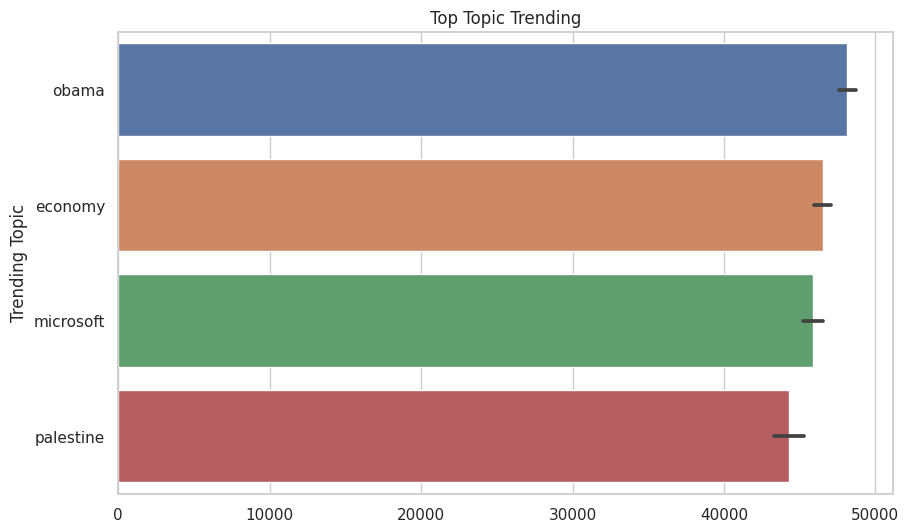

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Top Topic Trending")
sns.barplot(x=hits_data.index, y=hits_data['Topic'])
plt.ylabel("Trending Topic")

<Axes: >

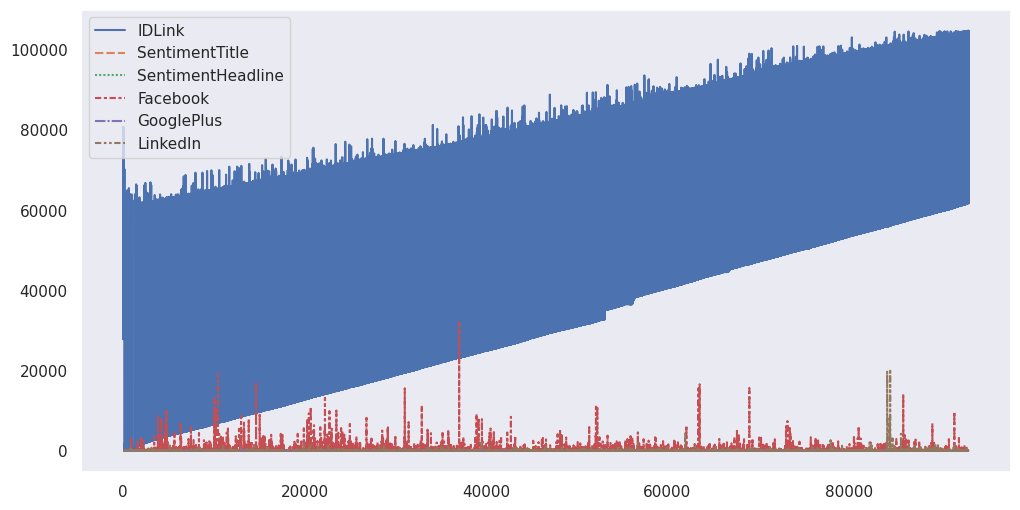

In [ ]:
sns.set_style("dark")
# Line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=hits_data)

<Axes: xlabel='Topic', ylabel='SentimentHeadline'>

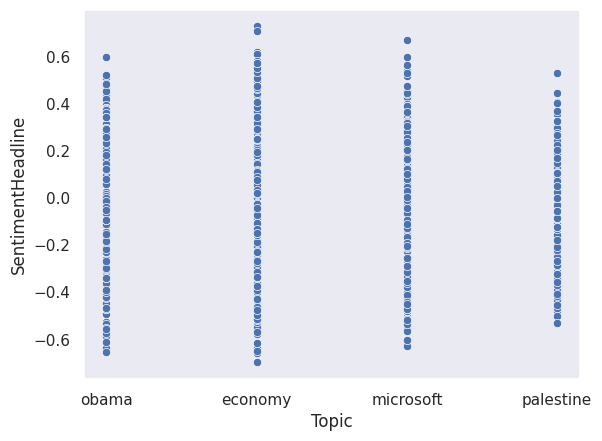

In [ ]:
sns.scatterplot(x=hits_data['Topic'], y=hits_data['SentimentHeadline'])

In [ ]:
hits_viz = ProfileReport(hits_data, title="Top Trending")
hits_viz
##This is interactive plot not able to show in jupyter.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
hits_data=sampled_data
hits_dataa=hits_data.loc[:,['Title','Headline','Topic']]
hits_dataa.Topic.value_counts()

economy      1669
obama        1476
microsoft    1094
palestine     423
Name: Topic, dtype: int64

Text(0.5, 0.98, 'Histogram number of characters in topics headlines')

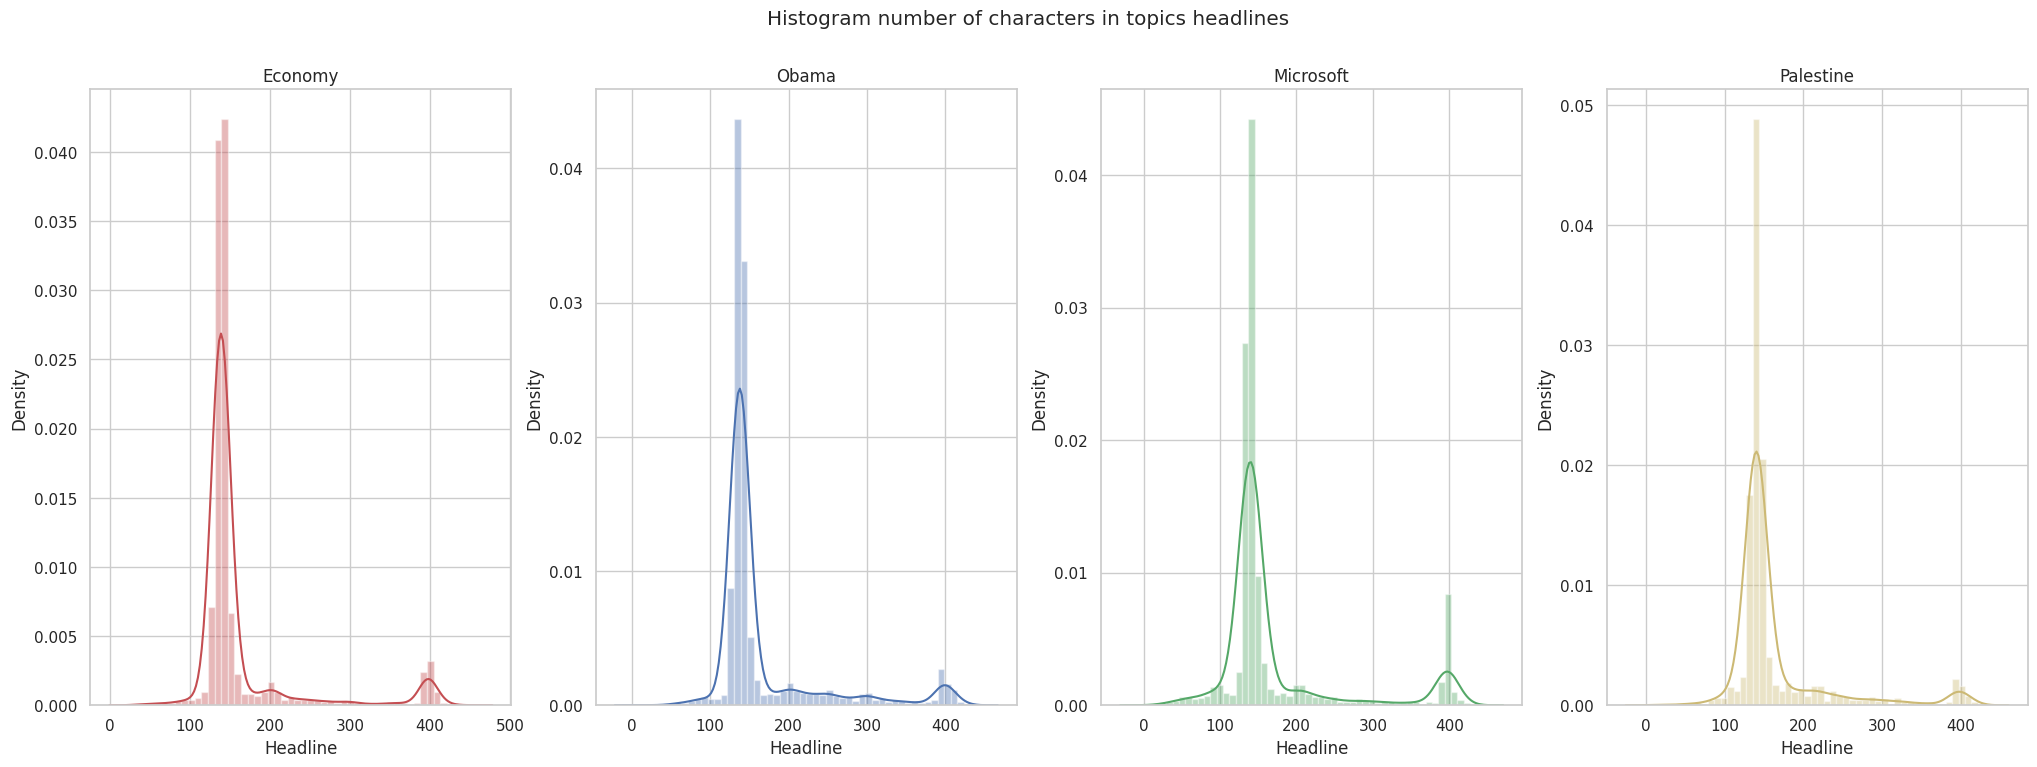

In [ ]:
sns.set(style='whitegrid')
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(25,8))

sns.distplot(df2[df2['Topic'] == 'economy']['Headline'].str.len(), kde=True, color='r', ax=ax1)
ax1.set_title('Economy')
sns.distplot(df2[df2['Topic'] == 'obama']['Headline'].str.len(), kde=True, color='b', ax=ax2)
ax2.set_title('Obama')
sns.distplot(df2[df2['Topic'] == 'microsoft']['Headline'].str.len(), kde=True, color='g', ax=ax3)
ax3.set_title('Microsoft')
sns.distplot(df2[df2['Topic'] == 'palestine']['Headline'].str.len(), kde=True, color='y', ax=ax4)
ax4.set_title('Palestine')

f.suptitle('Histogram number of characters in topics headlines')

We can see above they have similar characteristics and we can not say too much about a special feature of any of them, would be better to apply this method but for the words.

This is why, we are goind to compute and display a histogram of the number of words in the headlines of each topic:

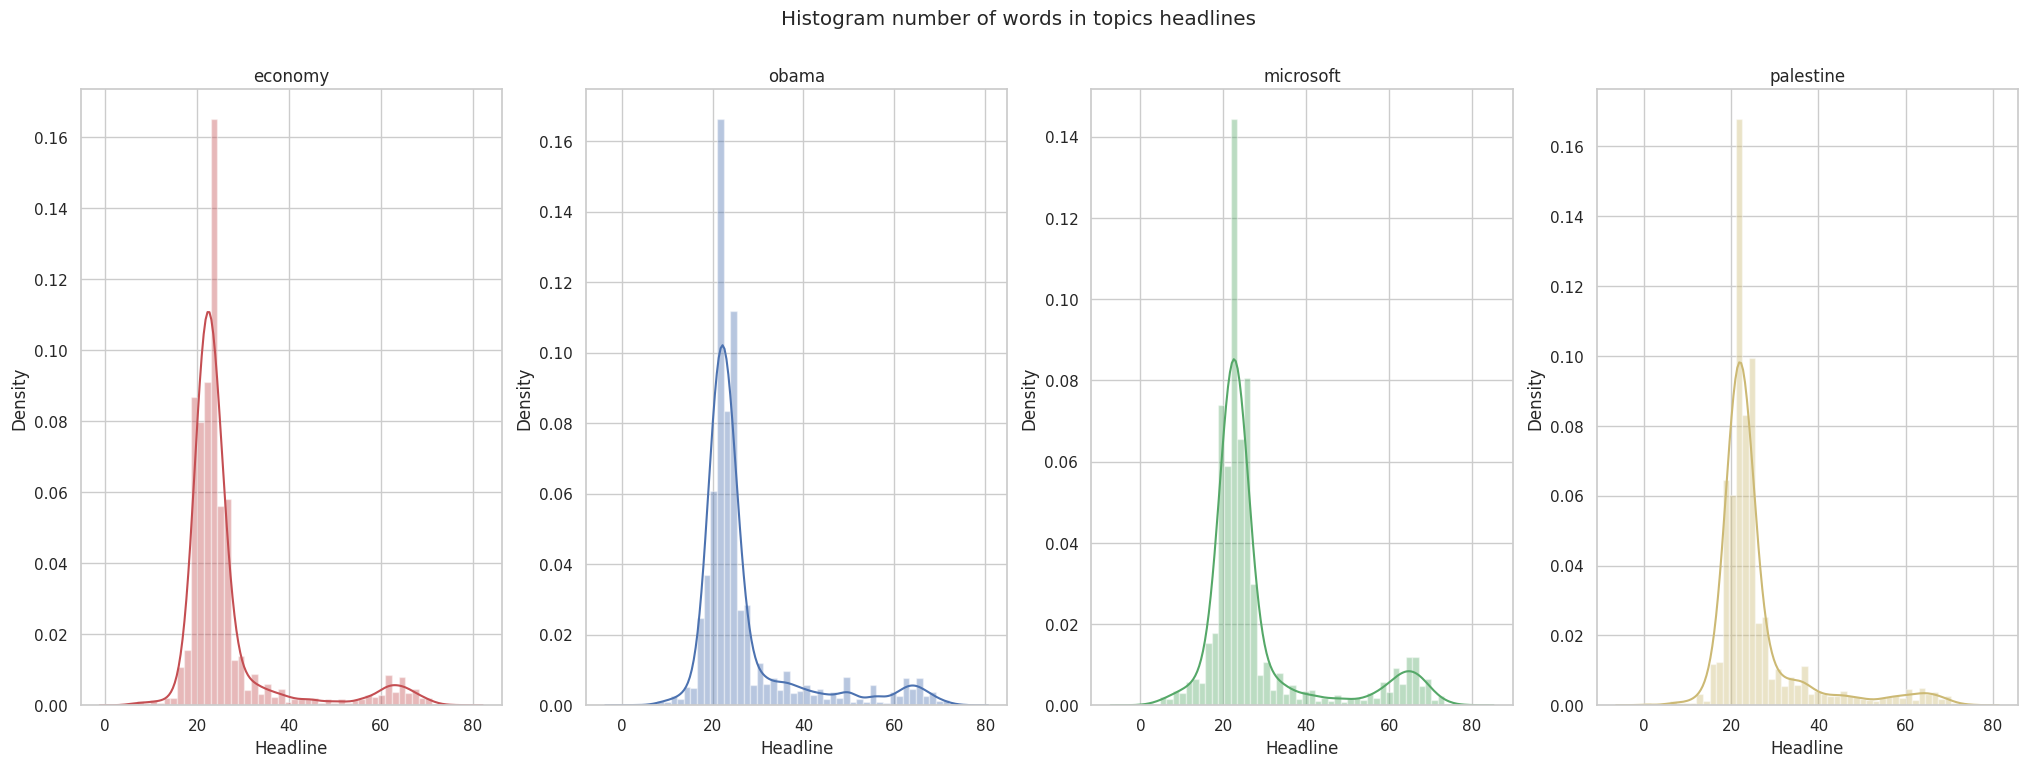

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_headline_lengths_by_topic(hits_data, topics, colors):
    num_topics = len(topics)

    # Create subplots based on the number of topics
    f, axes = plt.subplots(1, num_topics, figsize=(25, 8))

    for i, (topic, color) in enumerate(zip(topics, colors)):
        ax = axes[i]
        df = hits_data[(hits_data['Topic'] == topic) & hits_data['Headline'].notnull() & hits_data['Headline'].apply(lambda x: isinstance(x, str))]
        sns.distplot(df['Headline'].str.split().map(lambda x: len(x)), kde=True, ax=ax, color=color)
        ax.set_title(topic)

    f.suptitle('Histogram number of words in topics headlines')
    plt.show()

# List of topics you want to analyze
topics = ['economy', 'obama', 'microsoft', 'palestine']

# List of colors for each topic
colors = ['r', 'b', 'g', 'y']

# Call the function to create the subplots with different colors
plot_headline_lengths_by_topic(hits_data, topics, colors)


**Cleaning:**

We have to consider that the instances included in the file were obtained by several sources such as: Facebook, LinkedIn and Google Plus, as we know and have seen in some of the headlines are included characters which are not alphanumeric and belong to tags used in social media, these can be useful in specific tasks (mention or hashtag), however in the scope of topic classification such tags are not significatively useful. This is why in the current step we will get rid of them so as to keep only the corpus or core data:

In [8]:
import re
import string

def clean_text(text):
    # Remove URLs
    url = re.compile(r'https?://\S+|www\.\S+')
    text = url.sub('', text)

    # Remove HTML tags
    html = re.compile(r'<.*?>')
    text = html.sub('', text)

    # Remove emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub('', text)

    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    text = text.translate(table)

    # Remove extra spaces, dashes, and special characters
    text = re.sub(r'\s+', ' ', text)
    text = text.replace('—', ' ')
    text = text.replace('–', ' ')

    return text

hits_data['Headline']=hits_data['Headline'].astype(str).apply(lambda x : clean_text(x))


In [9]:
# example="I am a #king , _ 😂😂😂"
# print(clean_text(example))
print(hits_data.head(5))

    IDLink                                              Title  \
0  68153.0  Obama, Nerd President, Needs to Get Right With...   
1  47207.0  Johannesburg committed to developing job inten...   
2  71039.0                            Whose President Was He?   
3  44514.0  Argentina pays off 'holdout' bondholders, elev...   
4  98795.0  Obama: Trump displays ignorance, seeks tweets ...   

                                            Headline  \
0  President Barack Obama knocked off work on Fri...   
1  THE City of Johannesburg has committed itself ...   
2  If I spent all my time thinking about it Id be...   
3  In recent years soybean farmer Mario Caceres h...   
4  US President Barack Obama disparaged US Republ...   

                       Source    Topic          PublishDate  SentimentTitle  \
0  Wall Street Journal (blog)    obama  2015-12-21 16:46:40        0.067168   
1                      BDlive  economy  2016-05-04 12:41:17       -0.039591   
2           POLITICO Magazine    ob

In [10]:
# showing number of different values in Source column
hits_data['Source'].value_counts()

Bloomberg                                        86
Reuters                                          60
The Guardian                                     56
Business Insider                                 52
ABC News                                         51
                                                 ..
THISDAY Live                                      1
WAPT Jackson                                      1
EurekAlert!                                       1
SNAPPA Technology via Yahoo UK & Ireland News     1
Manufacturing.net                                 1
Name: Source, Length: 1435, dtype: int64

[nltk_data] Downloading package stopwords to /home/mr-
[nltk_data]     cern/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


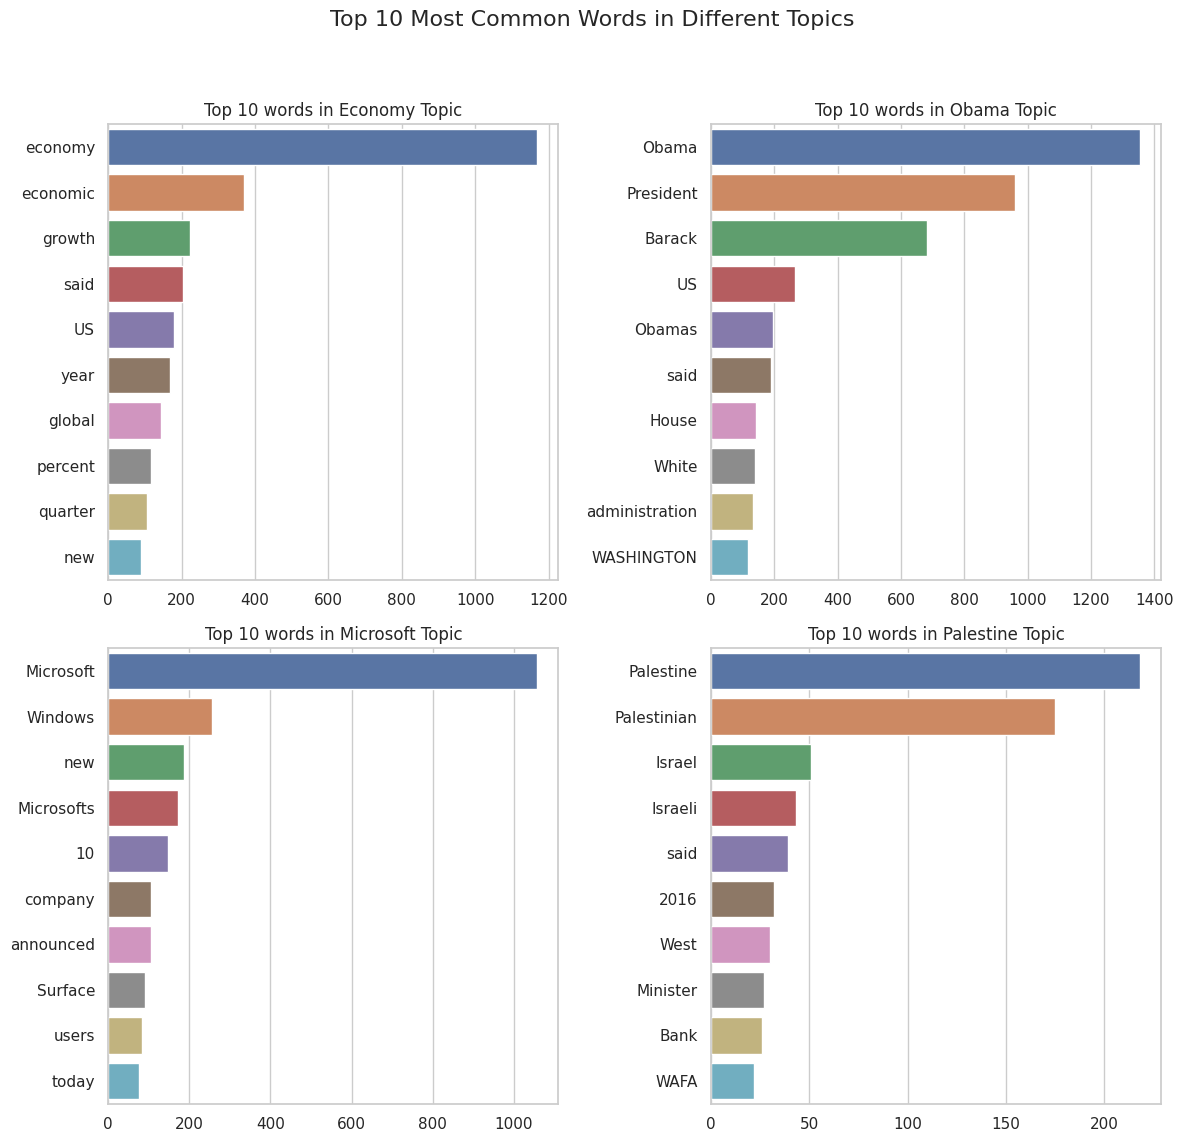

In [ ]:
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Define the topics you want to analyze
topics = ['economy', 'obama', 'microsoft', 'palestine']

# Create subplots for each topic
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Top 10 Most Common Words in Different Topics', fontsize=16)

for i, topic in enumerate(topics):
    row = i // 2
    col = i % 2

    # Get word counts for the current topic
    word_count = Counter(" ".join(hits_data[hits_data['Topic']==topic]['Headline']).split()).most_common(100)

    # Filter out stopwords and select the top 10 words
    x = []
    y = []
    for word, count in word_count:
        if word.casefold() not in stop_words:
            x.append(word)
            y.append(count)

    # Create a bar plot for the current topic
    sns.barplot(x=y[:10], y=x[:10], ax=axs[row, col])
    axs[row, col].set_title(f'Top 10 words in {topic.capitalize()} Topic')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


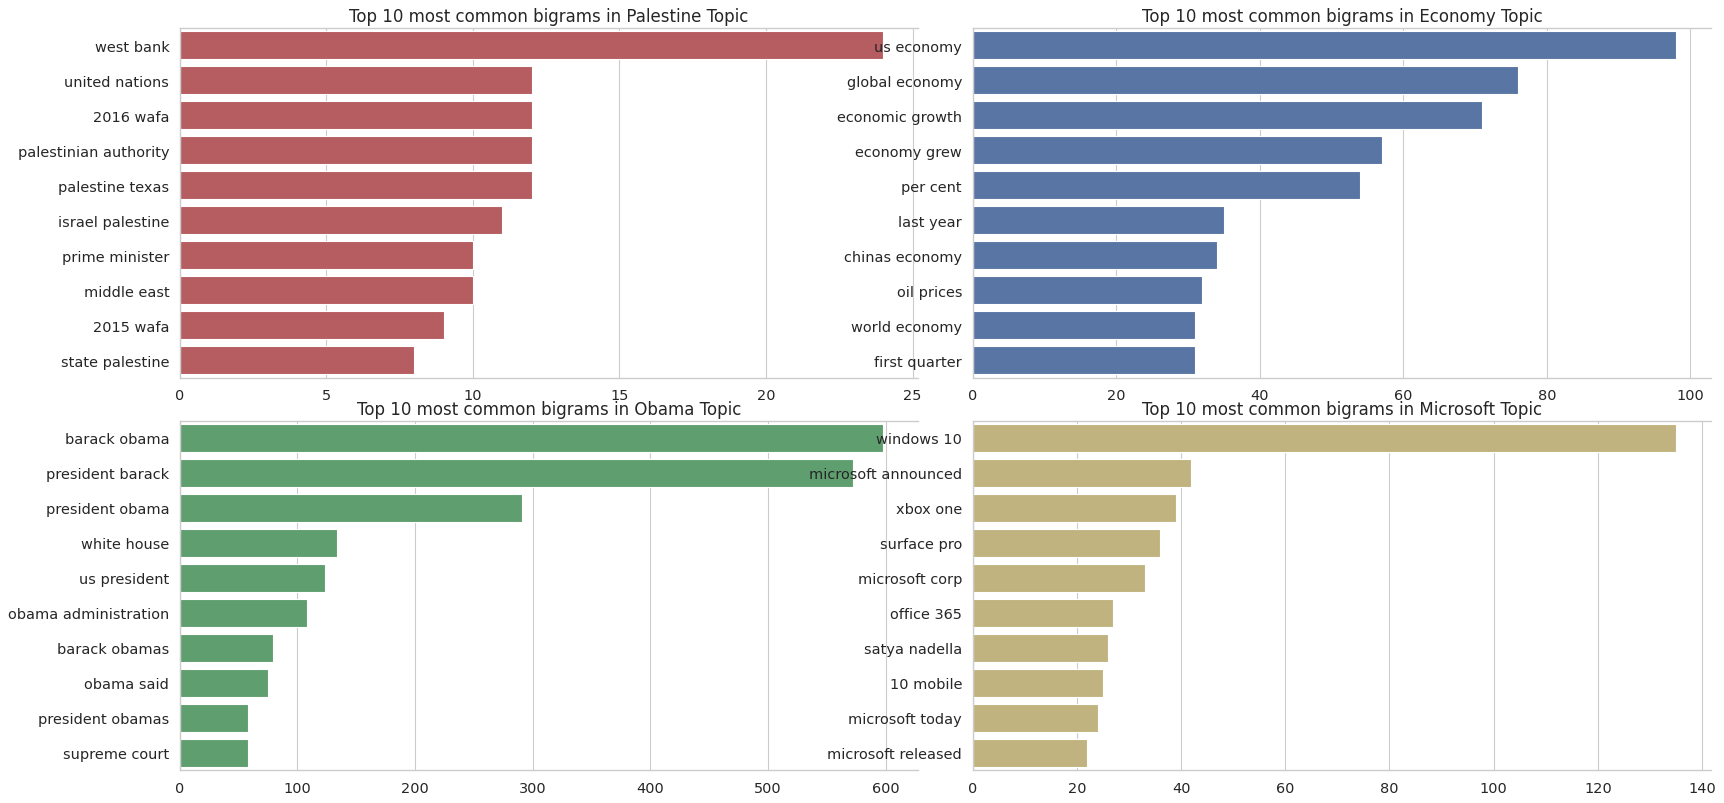

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define ngram generator function
def generate_ngrams(text, n_gram):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop_words]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

# Bigrams
N=10
df=hits_data
economy_bigrams = defaultdict(int)
obama_bigrams = defaultdict(int)
microsoft_bigrams = defaultdict(int)
palestine_bigrams = defaultdict(int)

for instance in df[df['Topic']=='palestine']['Headline']:
    for word in generate_ngrams(instance, n_gram=2):
        palestine_bigrams[word] += 1

for instance in df[df['Topic']=='obama']['Headline']:
    for word in generate_ngrams(instance, n_gram=2):
        obama_bigrams[word] += 1

for instance in df[df['Topic']=='economy']['Headline']:
    for word in generate_ngrams(instance, n_gram=2):
        economy_bigrams[word] += 1

for instance in df[df['Topic']=='microsoft']['Headline']:
    for word in generate_ngrams(instance, n_gram=2):
        microsoft_bigrams[word] += 1

df_palestine_bigrams = pd.DataFrame(sorted(palestine_bigrams.items(), key=lambda x: x[1])[::-1])
df_obama_bigrams = pd.DataFrame(sorted(obama_bigrams.items(), key=lambda x: x[1])[::-1])
df_economy_bigrams = pd.DataFrame(sorted(economy_bigrams.items(), key=lambda x: x[1])[::-1])
df_microsoft_bigrams = pd.DataFrame(sorted(microsoft_bigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(2, 2, figsize=(20, 10), dpi=80)
plt.tight_layout()

sns.barplot(y=df_palestine_bigrams[0].values[:N], x=df_palestine_bigrams[1].values[:N], ax=axes[0,0], color='r')
axes[0,0].spines['right'].set_visible(False)
axes[0,0].tick_params(axis='x', labelsize=13)
axes[0,0].tick_params(axis='y', labelsize=13)

sns.barplot(y=df_economy_bigrams[0].values[:N], x=df_economy_bigrams[1].values[:N], ax=axes[0,1], color='b')
axes[0,1].spines['right'].set_visible(False)
axes[0,1].tick_params(axis='x', labelsize=13)
axes[0,1].tick_params(axis='y', labelsize=13)

sns.barplot(y=df_obama_bigrams[0].values[:N], x=df_obama_bigrams[1].values[:N], ax=axes[1,0], color='g')
axes[1,0].spines['right'].set_visible(False)
axes[1,0].tick_params(axis='x', labelsize=13)
axes[1,0].tick_params(axis='y', labelsize=13)

sns.barplot(y=df_microsoft_bigrams[0].values[:N], x=df_microsoft_bigrams[1].values[:N], ax=axes[1,1], color='y')
axes[1,1].spines['right'].set_visible(False)
axes[1,1].tick_params(axis='x', labelsize=13)
axes[1,1].tick_params(axis='y', labelsize=13)

axes[0,0].set_title(f'Top {N} most common bigrams in Palestine Topic', fontsize=15)
axes[0,1].set_title(f'Top {N} most common bigrams in Economy Topic', fontsize=15)
axes[1,0].set_title(f'Top {N} most common bigrams in Obama Topic', fontsize=15)
axes[1,1].set_title(f'Top {N} most common bigrams in Microsoft Topic', fontsize=15)

plt.show()
plt.tight_layout()


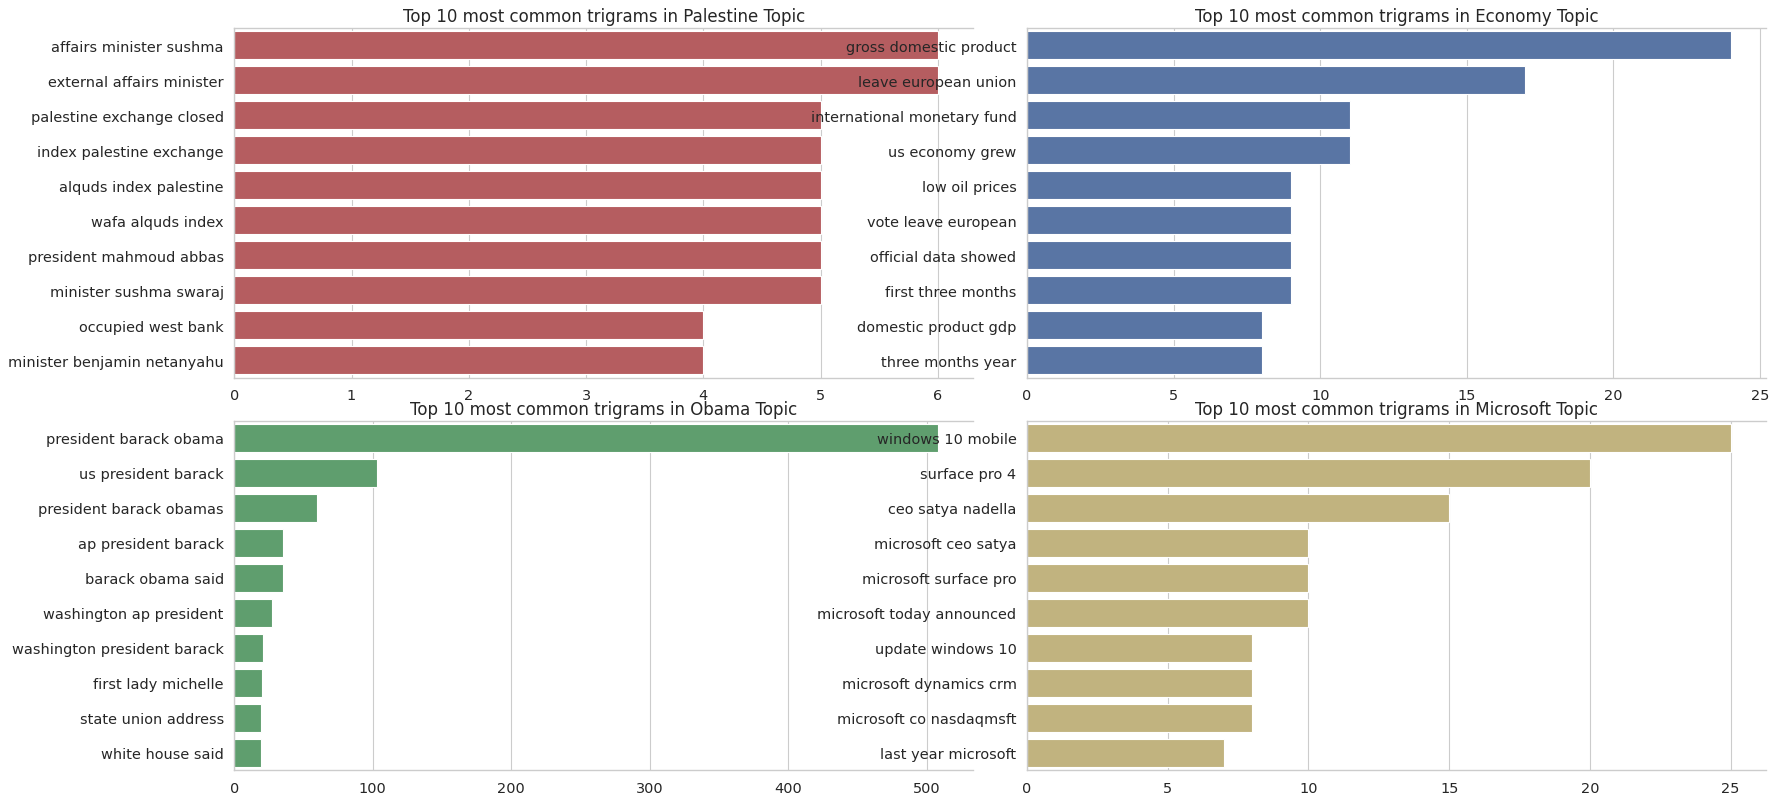

<Figure size 640x480 with 0 Axes>

In [ ]:
# Trigrams
economy_trigrams = defaultdict(int)
obama_trigrams = defaultdict(int)
microsoft_trigrams = defaultdict(int)
palestine_trigrams = defaultdict(int)

for instance in df[df['Topic']=='palestine']['Headline']:
    for word in generate_ngrams(instance, n_gram=3):
        palestine_trigrams[word] += 1

for instance in df[df['Topic']=='obama']['Headline']:
    for word in generate_ngrams(instance, n_gram=3):
        obama_trigrams[word] += 1

for instance in df[df['Topic']=='economy']['Headline']:
    for word in generate_ngrams(instance, n_gram=3):
        economy_trigrams[word] += 1

for instance in df[df['Topic']=='microsoft']['Headline']:
    for word in generate_ngrams(instance, n_gram=3):
        microsoft_trigrams[word] += 1

df_palestine_trigrams = pd.DataFrame(sorted(palestine_trigrams.items(), key=lambda x: x[1])[::-1])
df_obama_trigrams = pd.DataFrame(sorted(obama_trigrams.items(), key=lambda x: x[1])[::-1])
df_economy_trigrams = pd.DataFrame(sorted(economy_trigrams.items(), key=lambda x: x[1])[::-1])
df_microsoft_trigrams = pd.DataFrame(sorted(microsoft_trigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(2, 2, figsize=(20, 10), dpi=80)
plt.tight_layout()

sns.barplot(y=df_palestine_trigrams[0].values[:N], x=df_palestine_trigrams[1].values[:N], ax=axes[0,0], color='r')
axes[0,0].spines['right'].set_visible(False)
axes[0,0].tick_params(axis='x', labelsize=13)
axes[0,0].tick_params(axis='y', labelsize=13)

sns.barplot(y=df_economy_trigrams[0].values[:N], x=df_economy_trigrams[1].values[:N], ax=axes[0,1], color='b')
axes[0,1].spines['right'].set_visible(False)
axes[0,1].tick_params(axis='x', labelsize=13)
axes[0,1].tick_params(axis='y', labelsize=13)

sns.barplot(y=df_obama_trigrams[0].values[:N], x=df_obama_trigrams[1].values[:N], ax=axes[1,0], color='g')
axes[1,0].spines['right'].set_visible(False)
axes[1,0].tick_params(axis='x', labelsize=13)
axes[1,0].tick_params(axis='y', labelsize=13)

sns.barplot(y=df_microsoft_trigrams[0].values[:N], x=df_microsoft_trigrams[1].values[:N], ax=axes[1,1], color='y')
axes[1,1].spines['right'].set_visible(False)
axes[1,1].tick_params(axis='x', labelsize=13)
axes[1,1].tick_params(axis='y', labelsize=13)

axes[0,0].set_title(f'Top {N} most common trigrams in Palestine Topic', fontsize=15)
axes[0,1].set_title(f'Top {N} most common trigrams in Economy Topic', fontsize=15)
axes[1,0].set_title(f'Top {N} most common trigrams in Obama Topic', fontsize=15)
axes[1,1].set_title(f'Top {N} most common trigrams in Microsoft Topic', fontsize=15)

plt.show()
plt.tight_layout()

In [12]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.3 MB/s eta 0:00:00


Models

In [13]:
# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast

# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

# And pandas for data import + sklearn because you allways need sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

In [14]:
### --------- Import data --------- ###
data = hits_data[['Headline', 'Topic']]

# Set your model output as categorical and save in new label col
data['Topic_label'] = pd.Categorical(data['Topic'])

# Transform your output to numeric
data['Topic'] = data['Topic_label'].cat.codes
print(data)
# Split into train and test - stratify over Issue
data_train, data_test = train_test_split(data, test_size = 0.1)

### --------- Setup BERT ---------- ###

# Name of the BERT model to use
model_name = 'bert-base-uncased'

# Max length of tokens
max_length = 45

# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
config.output_hidden_states = False

# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)

# Load the Transformers BERT model
transformer_model = TFBertModel.from_pretrained(model_name, config = config)


### ------- Build the model ------- ###

# Load the MainLayer
bert = transformer_model.layers[0]

# Build your model input
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
inputs = {'input_ids': input_ids}

# Load the Transformers BERT model as a layer in a Keras model
bert_model = bert(inputs)[1]
dropout = Dropout(config.hidden_dropout_prob, name='pooled_output')
pooled_output = dropout(bert_model, training=False)

# Then build your model output
topics = Dense(units=len(data_train.Topic_label.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='topic')(pooled_output)
outputs = {'topic': topics}

# And combine it all in a model object
model = Model(inputs=inputs, outputs=outputs, name='BERT_MultiLabel_MultiClass')

# Take a look at the model
model.summary()

                                               Headline  Topic Topic_label
0     President Barack Obama knocked off work on Fri...      2       obama
1     THE City of Johannesburg has committed itself ...      0     economy
2     If I spent all my time thinking about it Id be...      2       obama
3     In recent years soybean farmer Mario Caceres h...      0     economy
4     US President Barack Obama disparaged US Republ...      2       obama
...                                                 ...    ...         ...
4657  Scottish and UK governments have been urged to...      0     economy
4658  What happened on April 12 at the University of...      3   palestine
4659  RTR4M87B Ted Cruz will not attend President Ba...      2       obama
4660  In its recent Emerging Stronger report the Ont...      0     economy
4661  News Microsoft announced the acquisition of So...      1   microsoft

[4662 rows x 3 columns]


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "BERT_MultiLabel_MultiClass"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_ids (InputLayer)      [(None, 45)]              0         
                                                                 
 bert (TFBertMainLayer)      TFBaseModelOutputWithPo   109482240 
                             olingAndCrossAttentions             
                             (last_hidden_state=(Non             
                             e, 45, 768),                        
                              pooler_output=(None, 7             
                             68),                                
                              past_key_values=None,              
                             hidden_states=None, att             
                             entions=None, cross_att             
                             entions=None)                       
                                        

In [16]:
### ------- Train the model ------- ###
from tensorflow.keras.optimizers import Adam

# Set an optimizer
optimizer = Adam(learning_rate=5e-05, epsilon=1e-08)

# Set loss and metrics
loss = {'topic': CategoricalCrossentropy(from_logits=True)}


# Compile the model
model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

# Ready output data for the model
y_topic = to_categorical(data_train['Topic'])

# Tokenize the input (takes some time)
x = tokenizer(
    text=data_train['Headline'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

# Fit the model
history = model.fit(
    x={'input_ids': x['input_ids']},
    y={'topic': y_topic},
    validation_split=0.1,
    batch_size=64,
    epochs=2,
    verbose=1)

Epoch 1/2
59/59 [==============================] - 2128s 35s/step - loss: 0.6029 - accuracy: 0.7762 - val_loss: 0.1086 - val_accuracy: 0.9714
Epoch 2/2
59/59 [==============================] - 2073s 35s/step - loss: 0.0912 - accuracy: 0.9730 - val_loss: 0.0836 - val_accuracy: 0.9714


In [17]:
def plot_metrics(record):
  epoch_range = range(1, len(record.history['accuracy'])+1)
  plt.plot(epoch_range, record.history['accuracy'])
  plt.plot(epoch_range, record.history['val_accuracy'])
  plt.title('Classification Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, record.history['loss'])
  plt.plot(epoch_range, record.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

In [ ]:
### ----- Evaluate the model ------ ###

# Ready test data
test_y_topic = to_categorical(data_test['Topic'])

test_x = tokenizer(
    text=data_test['Headline'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = False,
    verbose = True)

# Run evaluation
model_eval = model.evaluate(
    x={'input_ids': test_x['input_ids']},
    y={'product': test_y_topic}
)

15/15 [==============================] - 22s 1s/step - loss: 0.0919 - accuracy: 0.9764


In [ ]:
label_predicted = model.predict(
    x={'input_ids': test_x['input_ids']},
)

15/15 [==============================] - 21s 1s/step


In [ ]:
print(label_predicted['topic'])
test_y_topic

[[-1.7125871   4.8261914  -1.8329566  -1.4352667 ]
 [ 4.808413   -1.3912343  -0.60679245 -2.0691304 ]
 [ 0.22565643 -1.8516924   3.3365734  -0.29485998]
 ...
 [-1.547097   -1.4503849   4.9682474  -1.1613685 ]
 [-1.7403784  -1.2965776   4.739276   -1.104759  ]
 [-1.7594917   4.7585807  -1.9358845  -1.3406243 ]]


array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
label_pred_max=[np.argmax(i) for i in label_predicted['topic']]
label_actual_max=[np.argmax(i) for i in test_y_topic]

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(label_pred_max, label_actual_max)

print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       153
           1       0.99      1.00      1.00       116
           2       1.00      0.96      0.98       153
           3       0.90      0.98      0.94        45

    accuracy                           0.98       467
   macro avg       0.96      0.98      0.97       467
weighted avg       0.98      0.98      0.98       467



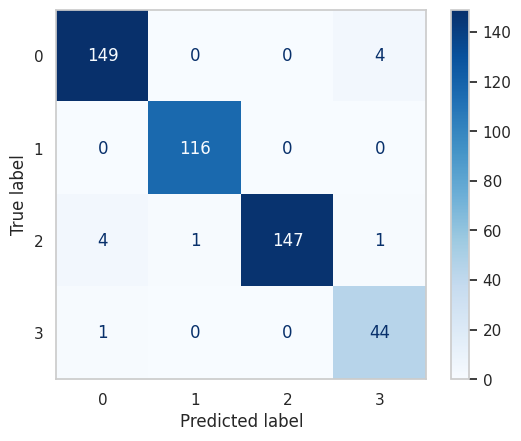

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(label_pred_max, label_actual_max), display_labels=np.unique(label_actual_max))
disp.plot(cmap='Blues')
plt.grid(False)

In [15]:
hits_data['Headline']=hits_data['Headline'].str.replace('\d+', '')

In [ ]:
# Tokenizing:
df[['Headline','Topic']]
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

df['Headline_without_stopwords'] = df['Headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df[['Headline','Headline_without_stopwords']]

Headline  \
17026  President Barack Obama knocked off work on Fri...   
70005  THE City of Johannesburg has committed itself ...   
22941  If I spent all my time thinking about it Id be...   
66136  In recent years soybean farmer Mario Caceres h...   
78589  US President Barack Obama disparaged US Republ...   
...                                                  ...   
11371  Scottish and UK governments have been urged to...   
64651  What happened on April 12 at the University of...   
24808  RTR4M87B Ted Cruz will not attend President Ba...   
34410  In its recent Emerging Stronger report the Ont...   
72097  News Microsoft announced the acquisition of So...   

                              Headline_without_stopwords  
17026  President Barack Obama knocked work Friday aft...  
70005  THE City Johannesburg committed developing res...  
22941  If I spent time thinking Id paralyzed Barack O...  
66136  In recent years soybean farmer Mario Caceres p...  
78589  US President Barack Obama disparaged US Republ...  
...                                                  ...  
11371  Scottish UK governments urged take early actio...  
64651  What happened April 12 University Minnesota cl...  
24808  RTR4M87B Ted Cruz attend President Barack Obam...  
34410  In recent Emerging Stronger report Ontario Cha...  
72097  News Microsoft announced acquisition Solair la...  

[4662 rows x 2 columns]

In [ ]:
# Train-test split:
training_portion=0.9
train_size = int(df.shape[0]*training_portion)

train_sentences = df['Headline_without_stopwords'][:train_size]
train_labels = df['Topic'][:train_size]

validation_sentences = df['Headline_without_stopwords'][train_size:]
validation_labels = df['Topic'][train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

4195
4195
4195
467
467


In [ ]:
tokenizer0 = Tokenizer()
tokenizer0.fit_on_texts(train_sentences)
word_index = tokenizer0.word_index
len(word_index)

13583

In [ ]:
vocab_size = 30000
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)

lengths=[]
for k in range(len(train_sequences)):
  lengths.append(len(train_sequences[k]))

pd.DataFrame(lengths, columns=['Lenghts']).describe()

Lenghts
count  4195.000000
mean     17.212872
std       7.544604
min       0.000000
25%      14.000000
50%      15.000000
75%      17.000000
max      50.000000

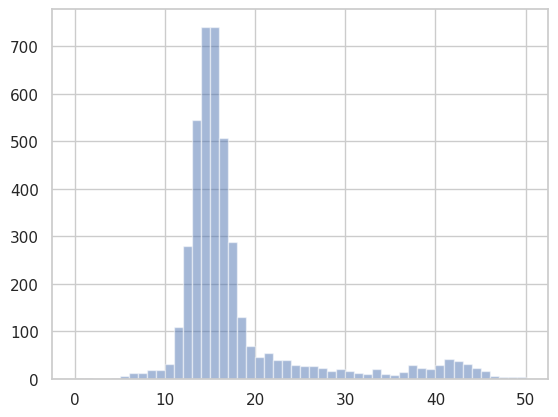

In [ ]:
plt.hist(lengths, bins=50, alpha=0.5)
plt.show()

In [ ]:
max_length = 45
trunc_type = 'post'
padding_type = 'post'

train_padded = pad_sequences(train_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences,padding=padding_type,maxlen=max_length,truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

17
45
14
45
11
45
467
(467, 45)


In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

np.unique(validation_label_seq)

[2]
[1]
[2]
(4195, 1)
[2]
[3]
[1]
(467, 1)


array([1, 2, 3, 4])

In [ ]:
from tensorflow.keras.optimizers import Adam

embedding_dim = 32
model = tf.keras.Sequential([
              tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
              tf.keras.layers.GlobalAveragePooling1D(),
              tf.keras.layers.Dense(24,activation='relu'),
              tf.keras.layers.Dense(5,activation='softmax')
])
opt=Adam(learning_rate=5e-3)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 45, 32)            960000    
                                                                 
 global_average_pooling1d_4  (None, 32)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_10 (Dense)            (None, 24)                792       
                                                                 
 dense_11 (Dense)            (None, 5)                 125       
                                                                 
Total params: 960917 (3.67 MB)
Trainable params: 960917 (3.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 5
history = model.fit(train_padded,training_label_seq,epochs=num_epochs,
                    validation_data=(validation_padded,validation_label_seq),
                    verbose=1)

Epoch 1/5
132/132 [==============================] - 3s 16ms/step - loss: 1.0430 - accuracy: 0.5912 - val_loss: 0.4769 - val_accuracy: 0.8480
Epoch 2/5
132/132 [==============================] - 2s 15ms/step - loss: 0.1869 - accuracy: 0.9609 - val_loss: 0.1687 - val_accuracy: 0.9422
Epoch 3/5
132/132 [==============================] - 2s 14ms/step - loss: 0.0338 - accuracy: 0.9936 - val_loss: 0.1601 - val_accuracy: 0.9465
Epoch 4/5
132/132 [==============================] - 2s 14ms/step - loss: 0.0102 - accuracy: 0.9990 - val_loss: 0.1466 - val_accuracy: 0.9507
Epoch 5/5
132/132 [==============================] - 2s 15ms/step - loss: 0.0047 - accuracy: 0.9995 - val_loss: 0.1515 - val_accuracy: 0.9465


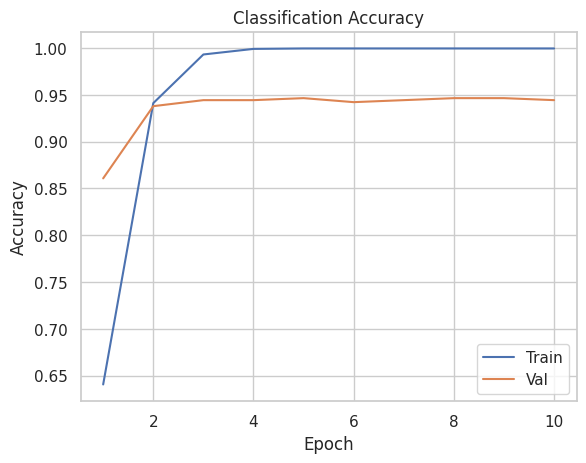

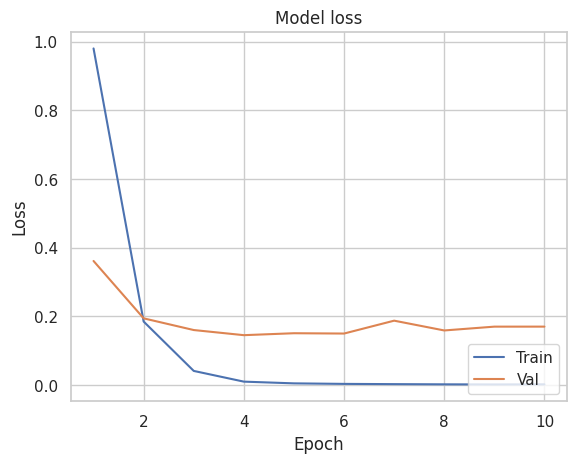

In [ ]:
plot_metrics(history)

In [ ]:
# Prediction for validation set:
# Let us predict the topics for the validation set and print the first 5 so as to compare them and compute the error metrics:

topic_pred=model.predict(validation_padded)
topic_pred


15/15 [==============================] - 0s 891us/step


array([[2.0499216e-07, 2.7004845e-04, 9.9967217e-01, 2.1952349e-08,
        5.7537171e-05],
       [1.4172708e-05, 1.4927377e-01, 6.4831316e-03, 7.5919056e-01,
        8.5038461e-02],
       [1.5446160e-08, 9.9999923e-01, 3.1380927e-07, 3.6489791e-07,
        1.8180792e-09],
       ...,
       [1.1985596e-08, 3.8999306e-06, 9.9997222e-01, 5.3741894e-10,
        2.3802349e-05],
       [1.1171679e-06, 9.8372316e-01, 7.8669364e-06, 1.6247215e-02,
        2.0476804e-05],
       [3.6971556e-08, 2.8843157e-05, 1.0873346e-07, 9.9762279e-01,
        2.3481885e-03]], dtype=float32)

In [ ]:
# As we know the output corresponds to arrays of 5 values corresponding to probability of instances belonging to each class,
#     from these we have to obtain the maximum of them (argmax) and we will get the class predicted:

class_pred_val = [np.argmax(i) for i in topic_pred]
print(class_pred_val[:5])

[2, 3, 1, 1, 4]


In [ ]:
validation_label_seq[:5]

array([[2],
       [3],
       [1],
       [1],
       [4]])

In [ ]:
validation_sentences[:5]

88637    Cleveland Cavaliers head coach Tyronn Lue grea...
29736                           Its touchy subject Redmond
30810    THE SEAT With 32inch seat pitch one roomiest e...
36420    THE Scottish private sector economy shed jobs ...
88847    Palestinian Authority President Mahmoud Abbas ...
Name: Headline_without_stopwords, dtype: object

In [ ]:
validation_labels[:5]

88637        obama
29736    microsoft
30810      economy
36420      economy
88847    palestine
Name: Topic, dtype: object

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(class_pred_val,validation_label_seq))

              precision    recall  f1-score   support

           1       0.97      0.92      0.94       183
           2       0.93      0.97      0.95       132
           3       0.96      0.96      0.96       109
           4       0.87      0.91      0.89        43

    accuracy                           0.94       467
   macro avg       0.93      0.94      0.94       467
weighted avg       0.95      0.94      0.94       467



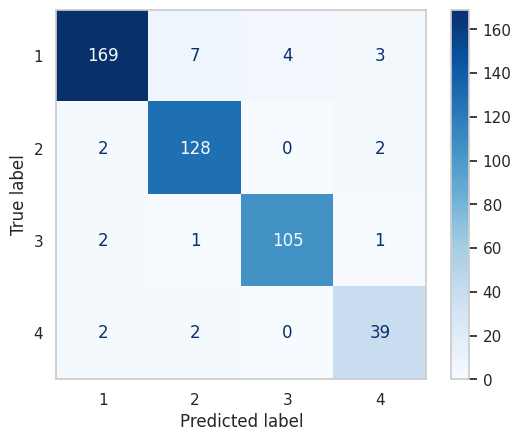

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(class_pred_val,validation_label_seq), display_labels=np.unique(validation_label_seq))
disp.plot(cmap='Blues')
plt.grid(False)

In [ ]:
label_tokenizer.word_index

{'economy': 1, 'obama': 2, 'microsoft': 3, 'palestine': 4}

In [ ]:
tokenizer_glove = Tokenizer()
tokenizer_glove.fit_on_texts(train_sentences)
word_index_glove = tokenizer_glove.word_index
len(word_index_glove)

13583

In [ ]:
train_glove_sequences=tokenizer_glove.texts_to_sequences(train_sentences)
train_glove_padded = pad_sequences(train_glove_sequences,maxlen=max_length,
                                   padding=padding_type,truncating=trunc_type)

train_glove_padded.shape

(4195, 45)

In [ ]:
val_glove_sequences=tokenizer_glove.texts_to_sequences(validation_sentences)
val_glove_padded = pad_sequences(val_glove_sequences,maxlen=max_length,
                                 padding=padding_type,truncating=trunc_type)

val_glove_padded.shape

vocab_size_glove=len(word_index_glove)

In [ ]:
embeddings_index = {};
with open('/home/mr-cern/Desktop/Python/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;


In [ ]:
import numpy as np

# Determine the number of unique words in your dataset
num_words = len(embeddings_index)  # Adjust this according to your data

# Initialize embeddings_matrix with the correct shape
embedding_dim = 100  # Adjust this based on the dimension of your embeddings
embeddings_matrix = np.zeros((num_words, embedding_dim))

# Iterate through your words and populate embeddings_matrix
for i, word in enumerate(word_index.keys()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector


In [ ]:
# Assuming embeddings_matrix contains the pre-trained GloVe embeddings
embedding_dim_glove = 100

# Check the actual vocabulary size from embeddings_matrix
vocab_size_glove, embedding_dim_check = embeddings_matrix.shape

# Make sure embedding_dim_glove matches embedding_dim_check
assert embedding_dim_glove == embedding_dim_check, "Embedding dimensions don't match"

# Create the model with the correct vocabulary size and embedding dimension
model_glove = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size_glove, embedding_dim_glove, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


In [ ]:
# Pre-trained model 1:
# This model has to be similar to the scratch one in terms of layers so as to compare both and quantify the impact of using Glove weights in the embedding layer:


opt=Adam(learning_rate=5e-3)
model_glove.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model_glove.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 45, 100)           40000000  
                                                                 
 global_average_pooling1d_3  (None, 100)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_6 (Dense)             (None, 24)                2424      
                                                                 
 dense_7 (Dense)             (None, 5)                 125       
                                                                 
Total params: 40002549 (152.60 MB)
Trainable params: 2549 (9.96 KB)
Non-trainable params: 40000000 (152.59 MB)
_________________________________________________________________


In [ ]:
num_epochs = 10
history_glove = model_glove.fit(train_glove_padded,training_label_seq,epochs=num_epochs,
                    validation_data=(val_glove_padded,validation_label_seq),verbose=1)

Epoch 1/10
132/132 [==============================] - 2s 2ms/step - loss: 0.6509 - accuracy: 0.7871 - val_loss: 0.2975 - val_accuracy: 0.9079
Epoch 2/10
132/132 [==============================] - 0s 1ms/step - loss: 0.2385 - accuracy: 0.9263 - val_loss: 0.2118 - val_accuracy: 0.9251
Epoch 3/10
132/132 [==============================] - 0s 1ms/step - loss: 0.1941 - accuracy: 0.9380 - val_loss: 0.2012 - val_accuracy: 0.9336
Epoch 4/10
132/132 [==============================] - 0s 1ms/step - loss: 0.1740 - accuracy: 0.9421 - val_loss: 0.1838 - val_accuracy: 0.9336
Epoch 5/10
132/132 [==============================] - 0s 1ms/step - loss: 0.1635 - accuracy: 0.9456 - val_loss: 0.1780 - val_accuracy: 0.9422
Epoch 6/10
132/132 [==============================] - 0s 1ms/step - loss: 0.1598 - accuracy: 0.9468 - val_loss: 0.1789 - val_accuracy: 0.9400
Epoch 7/10
132/132 [==============================] - 0s 1ms/step - loss: 0.1513 - accuracy: 0.9473 - val_loss: 0.1783 - val_accuracy: 0.9358
Epoch 

In [ ]:
# Pre-trained model 2:
# This model will contain layers we have not used yet, SpatialDropout1D which is the equivalent of dropout in dense layers, but applied to 1D-sequences, then a LSTM with 45 units (equal to the sentence length) and finally a Dense softmax layer:

from tensorflow.keras.optimizers import Adam

# Ensure vocab_size_glove is set correctly
vocab_size_glove = len(word_index) + 1  # word_index should be defined with your vocabulary

# Create the Embedding layer with the correct vocab_size_glove
model_glove2 = Sequential()
model_glove2.add(Embedding(vocab_size_glove, 100, weights=[embeddings_matrix], input_length=max_length, trainable=False))
model_glove2.add(SpatialDropout1D(0.2))
model_glove2.add(LSTM(45, dropout=0.2, recurrent_dropout=0.2))

opt=Adam(learning_rate=5e-3)
model_glove2.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model_glove2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 45, 100)           1358500   
                                                                 
 spatial_dropout1d (Spatial  (None, 45, 100)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 45)                26280     
                                                                 
Total params: 1384780 (5.28 MB)
Trainable params: 26280 (102.66 KB)
Non-trainable params: 1358500 (5.18 MB)
_________________________________________________________________


In [ ]:
num_epochs = 20
history_glove2 = model_glove2.fit(train_glove_padded,training_label_seq,epochs=num_epochs,
                      validation_data=(val_glove_padded,validation_label_seq),verbose=1,
                      batch_size=32)

Epoch 1/20
  1/132 [..............................] - ETA: 5s - loss: 0.7330 - accuracy: 0.7500132/132 [==============================] - 2s 18ms/step - loss: 0.5877 - accuracy: 0.8029 - val_loss: 0.4349 - val_accuracy: 0.8501
Epoch 2/20
132/132 [==============================] - 2s 18ms/step - loss: 0.5007 - accuracy: 0.8331 - val_loss: 0.3889 - val_accuracy: 0.8544
Epoch 3/20
132/132 [==============================] - 2s 19ms/step - loss: 0.4478 - accuracy: 0.8482 - val_loss: 0.3830 - val_accuracy: 0.8544
Epoch 4/20
132/132 [==============================] - 2s 18ms/step - loss: 0.4103 - accuracy: 0.8563 - val_loss: 0.3387 - val_accuracy: 0.8758
Epoch 5/20
132/132 [==============================] - 2s 17ms/step - loss: 0.4025 - accuracy: 0.8553 - val_loss: 0.3599 - val_accuracy: 0.8779
Epoch 6/20
132/132 [==============================] - 2s 17ms/step - loss: 0.3919 - accuracy: 0.8622 - val_loss: 0.3347 - val_accuracy: 0.8801
Epoch 7/20
132/132 [==============================] - 2s 1

In [ ]:
# Pre-trained model 3:
# We will go back to the first architecture and change the GlobalAveragePooling1D with LSTM of 45 units followed by 2 Dense layers, let us see the performance:

# Ensure vocab_size_glove is set correctly, including +1 for the reserved index
vocab_size_glove = len(word_index) + 1  # word_index should be defined with your vocabulary

# Create the Embedding layer with the correct vocab_size_glove
model_glove3 = Sequential()
model_glove3.add(Embedding(vocab_size_glove, 100, weights=[embeddings_matrix], input_length=max_length, trainable=False))
model_glove3.add(LSTM(45, dropout=0.2, recurrent_dropout=0.2))
model_glove3.add(Dense(24, activation='relu'))
model_glove3.add(Dense(5, activation='softmax'))

opt=Adam(learning_rate=5e-3)
model_glove3.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model_glove3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 45, 100)           1358500   
                                                                 
 lstm_1 (LSTM)               (None, 45)                26280     
                                                                 
 dense_8 (Dense)             (None, 24)                1104      
                                                                 
 dense_9 (Dense)             (None, 5)                 125       
                                                                 
Total params: 1386009 (5.29 MB)
Trainable params: 27509 (107.46 KB)
Non-trainable params: 1358500 (5.18 MB)
_________________________________________________________________


In [ ]:
num_epochs = 10
history_glove3 = model_glove3.fit(train_glove_padded,training_label_seq,epochs=num_epochs,
                      validation_data=(val_glove_padded,validation_label_seq),verbose=1,
                      batch_size=32)

Epoch 1/10
132/132 [==============================] - 2s 17ms/step - loss: 0.4181 - accuracy: 0.8372 - val_loss: 0.3754 - val_accuracy: 0.8630
Epoch 2/10
132/132 [==============================] - 2s 17ms/step - loss: 0.3426 - accuracy: 0.8741 - val_loss: 0.3020 - val_accuracy: 0.8887
Epoch 3/10
132/132 [==============================] - 2s 18ms/step - loss: 0.2997 - accuracy: 0.8889 - val_loss: 0.2868 - val_accuracy: 0.8865
Epoch 4/10
132/132 [==============================] - 3s 22ms/step - loss: 0.2487 - accuracy: 0.9120 - val_loss: 0.3044 - val_accuracy: 0.8822
Epoch 5/10
132/132 [==============================] - 3s 20ms/step - loss: 0.2204 - accuracy: 0.9204 - val_loss: 0.2797 - val_accuracy: 0.8801
Epoch 6/10
132/132 [==============================] - 2s 17ms/step - loss: 0.2046 - accuracy: 0.9271 - val_loss: 0.2788 - val_accuracy: 0.8887
Epoch 7/10
132/132 [==============================] - 2s 14ms/step - loss: 0.1981 - accuracy: 0.9259 - val_loss: 0.2721 - val_accuracy: 0.8972

In [ ]:
topic_pred_glove=model_glove3.predict(val_glove_padded)
topic_pred_glove

class_pred_val_glove = [np.argmax(i) for i in topic_pred_glove]
print(class_pred_val_glove[:5])

from sklearn.metrics import classification_report

print(classification_report(class_pred_val_glove,validation_label_seq))

15/15 [==============================] - 0s 4ms/step
[2, 1, 1, 1, 4]
              precision    recall  f1-score   support

           1       0.88      0.93      0.91       165
           2       0.93      0.81      0.86       158
           3       0.92      1.00      0.96       100
           4       0.76      0.77      0.76        44

    accuracy                           0.89       467
   macro avg       0.87      0.88      0.87       467
weighted avg       0.89      0.89      0.89       467



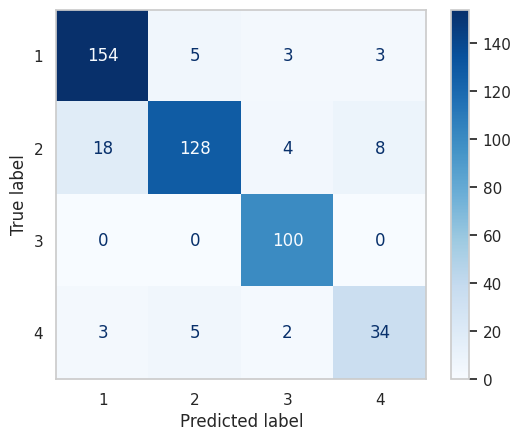

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(class_pred_val_glove,validation_label_seq), display_labels=np.unique(validation_label_seq))
disp.plot(cmap='Blues')
plt.grid(False)

In [ ]:
label_tokenizer.word_index

{'economy': 1, 'obama': 2, 'microsoft': 3, 'palestine': 4}

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load the dataset
data_file = '/home/mr-cern/Desktop/Python/Sampled_News_Final.csv'
data = pd.read_csv(data_file)

print(data.isnull().sum()) ## Checking null values in data and filling those values
data.fillna(0)

import re
import string

def clean_text(text):
    # Remove URLs
    url = re.compile(r'https?://\S+|www\.\S+')
    text = url.sub('', text)

    # Remove HTML tags
    html = re.compile(r'<.*?>')
    text = html.sub('', text)

    # Remove emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub('', text)

    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    text = text.translate(table)

    # Remove extra spaces, dashes, and special characters
    text = re.sub(r'\s+', ' ', text)
    text = text.replace('—', ' ')
    text = text.replace('–', ' ')

    return text

data['Headline']=data['Headline'].astype(str).apply(lambda x : clean_text(x))

# Combine Title and Headline for content analysis
data['Content'] = data['Title'] + ' ' + data['Headline']

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Content'])

# Calculate cosine similarity between items
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Define a function to list all available article titles
def list_all_article_titles():
    return data['Title'].tolist()

# Define a function to get content-based recommendations
def content_based_recommendations(title, num_recommendations=5):
    idx = data[data['Title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations + 1]
    item_indices = [i[0] for i in sim_scores]
    return data['Title'].iloc[item_indices]

# List all available article titles
all_article_titles = list_all_article_titles()
print("All Available Article Titles:")
for i, title in enumerate(all_article_titles):
    print(f"{i + 1}. {title}")


In [ ]:
# Example: Get content-based recommendations for a specific news article
article_title = "Obama, Nerd President, Needs to Get Right With 'Star Wars' Fans"
recommendations = content_based_recommendations(article_title)
print("\nContent-Based Recommendations:")
for i, recommendation in enumerate(recommendations):
    print(f"{i + 1}. {recommendation}")


Content-Based Recommendations:
1. Our new post-Obama Star Wars: Race, the Force and the dark side ...
2. Blowing up Death Stars bad for economy, Washington U Prof says
3. White House official confirms President Obama 'will NOT be ...
4. BATHROOM WARS
5. Obama to meet with Colombia's president at White House
